In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving music.csv to music.csv
User uploaded file "music.csv" with length 534853 bytes


About this file
Contains features for the following ten genres: blues, classical, country, disco, hiphop, jazz, metal, pop, reggae & rock.

About this file
Contains features for the following ten genres: blues, classical, country, disco, hiphop, jazz, metal, pop, reggae & rock.

tempo is the speed at which a passage of music is played

beats is the rythmic unit in music

chroma_stft Short Time Fourier Transform

rmse is Root Mean Square Error

spectral_centroid Indicates where the "center of mass" of the spectrum is located.

spectral_bandwidth It is the Wavelength interval in which a radiated spectral quantity is not less than half its maximum value

rolloff is the steepness of a transmission function with frequency

zero_crossing_rate The rate at which the signal changes from positive to negative or back

mfcc1 Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#sets the backend of matplotlib to the inline backend
%matplotlib inline
warnings.filterwarnings('ignore')
import statsmodels.api as sm

# Loading the data
df = pd.read_csv("music.csv", encoding= 'unicode_escape')
print(df.shape)
df.head(7)


(1000, 30)


,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
5,blues.00058.au,107.666016,51,0.356588,0.162028,2068.371125,2033.930047,4231.499413,0.104372,-95.436027,105.216700,-26.953012,60.830873,-4.828224,21.538471,-13.514778,12.122107,-20.233634,12.138658,-5.227018,10.262575,-9.438187,3.867535,-10.187453,3.588093,-3.100753,0.194597,0.842872,-3.416576,blues
6,blues.00066.au,161.499023,80,0.374710,0.110496,2340.432873,2256.538115,4972.503265,0.121775,-116.517402,97.430279,-13.880191,48.966759,-22.582244,27.753969,-20.228650,18.630770,-14.642884,8.473100,-16.644655,10.998190,-13.861801,9.735367,-5.089488,2.634638,-9.883816,6.159059,-7.682608,-4.852479,blues


In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [ ]:
#prints the summary statistic of the numerical variables
df.describe(include='all')

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
top,blues.00097.au,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hiphop
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,NaN,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,-8.921949,36.293063,-1.146627,14.634083,-5.129624,10.119876,-6.995752,7.730251,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875,NaN
std,NaN,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,21.695015,16.666987,12.222555,11.840802,9.941638,10.464090,8.284181,7.937977,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561,NaN
min,NaN,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,-89.901142,-18.768461,-38.903451,-28.424546,-32.933588,-24.947537,-31.653059,-12.051190,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203,NaN
25%,NaN,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,-24.223791,24.107395,-9.974552,5.097782,-12.870050,1.609752,-13.249849,1.621692,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000,NaN
50%,NaN,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,-10.716073,36.957074,-0.015239,15.007553,-5.717005,9.663922,-7.512299,7.151456,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198,NaN
75%,NaN,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,5.505793,48.212826,7.920911,23.857726,2.974185,18.708671,-0.383367,14.399350,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739,NaN


In [ ]:
#checking datatype for columns
df.dtypes

filename               object
tempo                 float64
beats                   int64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                  object
dtype: object

In [ ]:
#variance
df.var()

tempo                 8.007410e+02
beats                 2.023713e+02
chroma_stft           6.673155e-03
rmse                  4.314550e-03
spectral_centroid     5.126007e+05
spectral_bandwidth    2.770313e+05
rolloff               2.479901e+06
zero_crossing_rate    1.750123e-03
mfcc1                 1.004719e+04
mfcc2                 9.816882e+02
mfcc3                 4.706737e+02
mfcc4                 2.777884e+02
mfcc5                 1.493908e+02
mfcc6                 1.402046e+02
mfcc7                 9.883618e+01
mfcc8                 1.094972e+02
mfcc9                 6.862766e+01
mfcc10                6.301148e+01
mfcc11                4.649901e+01
mfcc12                4.512228e+01
mfcc13                3.808024e+01
mfcc14                2.509498e+01
mfcc15                2.376000e+01
mfcc16                2.096825e+01
mfcc17                2.070842e+01
mfcc18                1.496984e+01
mfcc19                1.410434e+01
mfcc20                1.472688e+01
dtype: float64

In [ ]:
#getting independent values from dataset
x = df.iloc[:, :-1].values
print(x)

[['blues.00081.au' 103.359375 50 ... 0.9659217436842504
  -7.570824746827892 2.9189869428522006]
 ['blues.00022.au' 95.703125 44 ... -2.436489803480714 3.3169126118124628
  -0.6084848944184776]
 ['blues.00031.au' 151.9990808823529 75 ... -11.719263564296815
  -11.025216212247594 -13.387260054984512]
 ...
 ['rock.00004.au' 103.359375 45 ... -0.8421915660329438
  -4.665995665598857 -4.787676848920879]
 ['rock.00006.au' 112.34714673913044 45 ... -1.9038030785390896
  -2.1967526217973044 -3.3951481688949894]
 ['rock.00066.au' 75.99954044117645 36 ... -0.39709723577477596
  -4.349921223709898 -4.2209984809933285]]


In [15]:
#getting dependent values from dataset
y = df.iloc[:,-1].values
print(y)

['blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'class

In [16]:
#checking for missing values
df.isnull()


,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
#count for missing values
print(df.isnull().sum())

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64


In [18]:
df = df.dropna()    # Dropping the missing values.
df.count()

filename              1000
tempo                 1000
beats                 1000
chroma_stft           1000
rmse                  1000
spectral_centroid     1000
spectral_bandwidth    1000
rolloff               1000
zero_crossing_rate    1000
mfcc1                 1000
mfcc2                 1000
mfcc3                 1000
mfcc4                 1000
mfcc5                 1000
mfcc6                 1000
mfcc7                 1000
mfcc8                 1000
mfcc9                 1000
mfcc10                1000
mfcc11                1000
mfcc12                1000
mfcc13                1000
mfcc14                1000
mfcc15                1000
mfcc16                1000
mfcc17                1000
mfcc18                1000
mfcc19                1000
mfcc20                1000
label                 1000
dtype: int64

In [19]:
print(df.isnull().sum())   # After dropping the values

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64


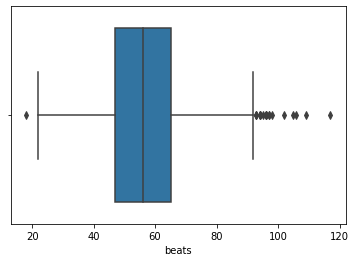

In [20]:
#detecting outliers for math score column
sns.boxplot(x=df['beats'])

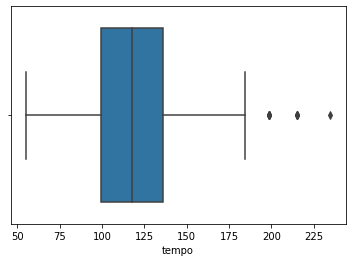

In [21]:
#detecting outliers for reading score column
sns.boxplot(x=df['tempo'])

In [22]:
#Transformation - Binning
data = df['beats']
data = data[:30] #taking only first 30 data items
data=np.sort(data)
print('Data:')
print(data)
print('')

#create three different matrices having 10 rows and 3 columns
b1=np.zeros((10,3)) 
b2=np.zeros((10,3)) 
b3=np.zeros((10,3)) 

#binning by mean
for i in range (0,30,3): 
  k=int(i/3) 
  mean=(data[i] + data[i+1] + data[i+2] )/3
  for j in range(3): 
    b1[k,j]=mean 
print("----Binning by mean:---- \n",b1)
print('')

#binning by median
for i in range (0,30,3): 
  k=int(i/3) 
  for j in range (3): 
    b2[k,j]=data[i+1] 
print("----Binning by median:---- \n",b2)
print('')

#binning by boundary
for i in range (0,30,3): 
  k=int(i/3) 
  for j in range (3): 
    if (data[i+j]-data[i]) < (data[i+2]-data[i+j]): 
      b3[k,j]=data[i] 
    else: 
      b3[k,j]=data[i+2]   
print("----Binning by boundary:----\n",b3)

Data:
[26 34 35 44 44 45 45 50 51 53 54 55 59 59 62 63 66 66 67 70 74 74 75 75
 78 79 80 80 83 91]

----Binning by mean:---- 
 [[31.66666667 31.66666667 31.66666667]
 [44.33333333 44.33333333 44.33333333]
 [48.66666667 48.66666667 48.66666667]
 [54.         54.         54.        ]
 [60.         60.         60.        ]
 [65.         65.         65.        ]
 [70.33333333 70.33333333 70.33333333]
 [74.66666667 74.66666667 74.66666667]
 [79.         79.         79.        ]
 [84.66666667 84.66666667 84.66666667]]

----Binning by median:---- 
 [[34. 34. 34.]
 [44. 44. 44.]
 [50. 50. 50.]
 [54. 54. 54.]
 [59. 59. 59.]
 [66. 66. 66.]
 [70. 70. 70.]
 [75. 75. 75.]
 [79. 79. 79.]
 [83. 83. 83.]]

----Binning by boundary:----
 [[26. 35. 35.]
 [44. 44. 45.]
 [45. 51. 51.]
 [53. 55. 55.]
 [59. 59. 62.]
 [63. 66. 66.]
 [67. 67. 74.]
 [74. 75. 75.]
 [78. 80. 80.]
 [80. 80. 91.]]


In [26]:
#Transformation - Normalization
import statistics
from sklearn import preprocessing

#min-max normalization
def minMaxNor(num,list):
    minNum=float(input("Enter Minimun Setting:\t"))
    maxNum = float(input("Enter Maximum Setting:\t"))
    ans=round(((num-min(list))/(max(list)-min(list))*(maxNum-minNum))+minNum,2)
    return ans
#df = pd.read_csv("StudentsPerformance.csv")
data = df['tempo']
data = data[:10] #taking only first 10 data items
data=np.sort(data)
print(data)

#z-score normalization
def zNor (num,mean,stdDv):
    return round((num-mean)/stdDv,2)

#modified z-score normalization
def zNorMAD (num,mean,abMeanDiv):
    return round((num-mean)/abMeanDiv,2)

#decimal-scaling normalization
def decNor(num,maxNum):
    digit=len(str(maxNum))
    div=pow(10,digit)
    return num/div

num=float(input("Enter an item from data : \t"))
if num in data:
  print("Calculating  min-max normalization")
  print("After doing min-max normalization :",minMaxNor(num,data))
  print("\nCalculating z-score normalization")
  print("After doing z-score normalization : \t", zNor(num,statistics.mean(data),statistics.stdev(data)))
  print("\nCalculating Modified z-score normalization")
  df = pd.DataFrame(data)
  print("After doing Modified z-score normalization : \t", zNorMAD(num,statistics.mean(data),df.mad()))
  print("\nCalculating decimal scaling normalization")
  print("After doing decimal scaling normalization : \t", decNor(num,max(data)))
else:
  print("Item entered is not present!!")
  print("Can't perform normalization on the selected item!")

[ 92.28515625  95.703125   103.359375   107.66601562 151.99908088
 151.99908088 151.99908088 161.49902344 161.49902344 184.5703125 ]
Enter an item from data : 	95.703125
Calculating  min-max normalization
Enter Minimun Setting:	92.28515625
Enter Maximum Setting:	161.49902344 
After doing min-max normalization : 94.85

Calculating z-score normalization
After doing z-score normalization : 	 -1.23

Calculating Modified z-score normalization
After doing Modified z-score normalization : 	 0   -1.39
dtype: float64

Calculating decimal scaling normalization
After doing decimal scaling normalization : 	 9.5703125e-10


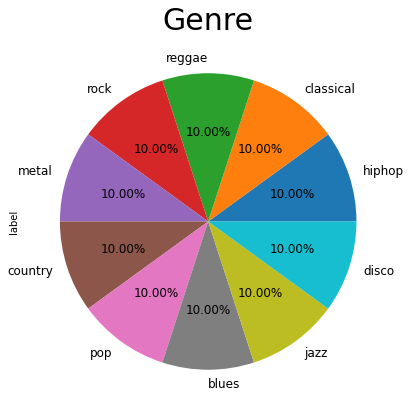

In [38]:
#pie charts of various columns
plt.figure(figsize=(25,15))

#subplot(nrows, ncols, plot_number) 
plt.subplot(231)
plt.title("Genre",fontsize=30)
df = pd.read_csv("music.csv")
df['label'].value_counts().plot.pie(autopct="%.2f%%",fontsize=12)
plt.show()


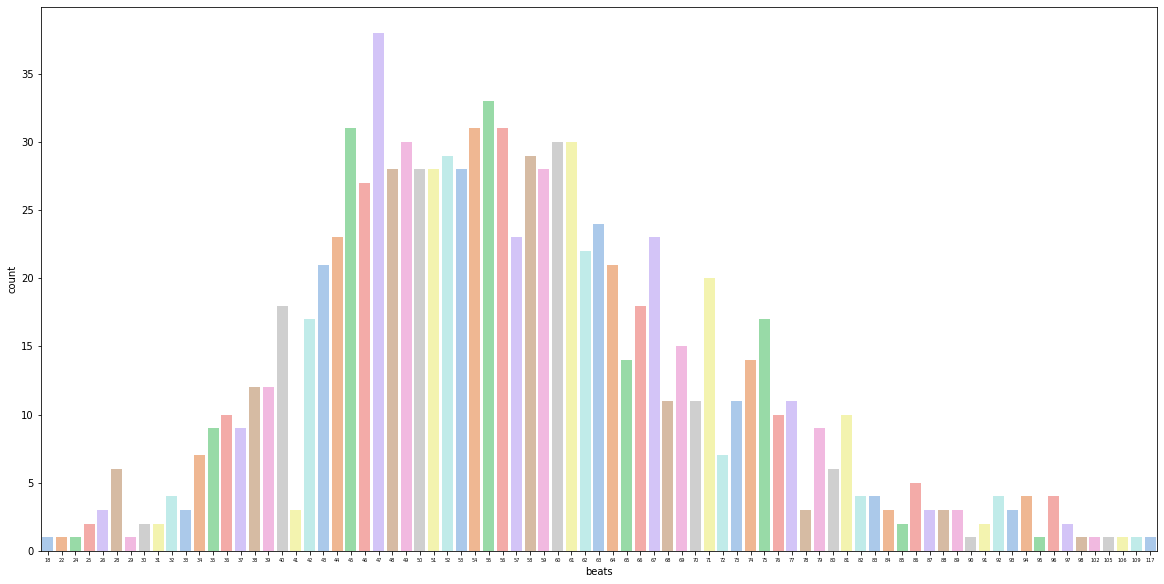

In [43]:

#finding no. of students who got a particular score in each subject
plt.figure(figsize=(20,10))
sns.countplot(x='beats',data=df,palette="pastel")
plt.xticks(fontsize=5)
plt.show()

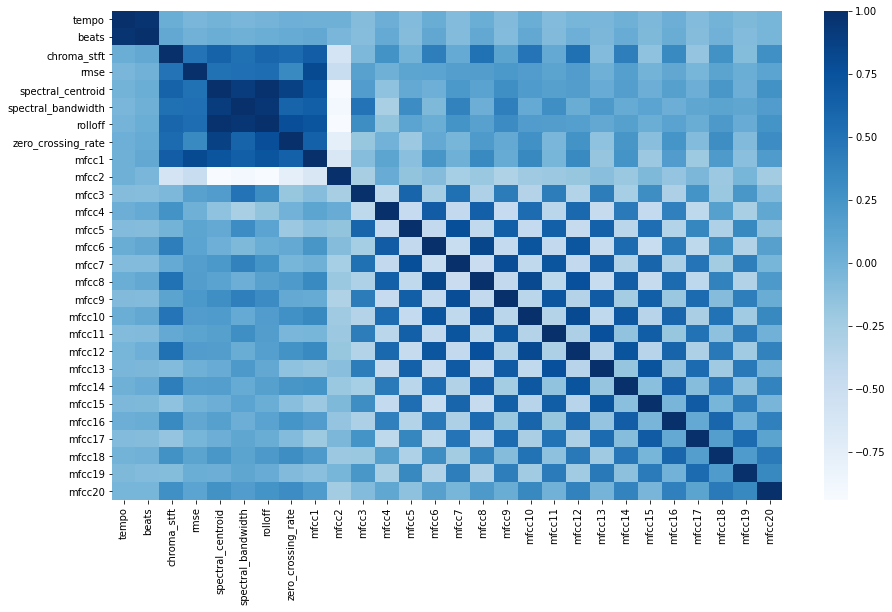

In [49]:
import seaborn as sns
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

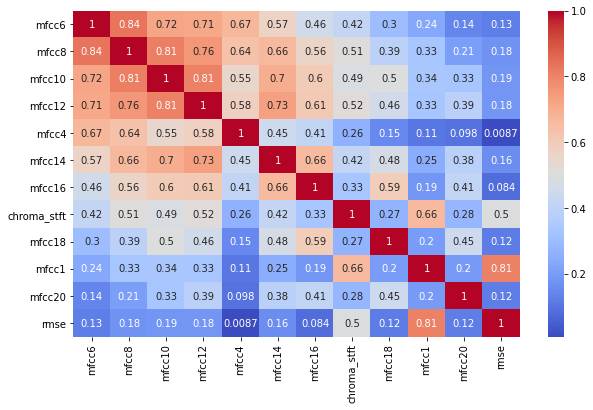

In [52]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = df.corr().nlargest(k, 'mfcc6')['mfcc6'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'coolwarm')

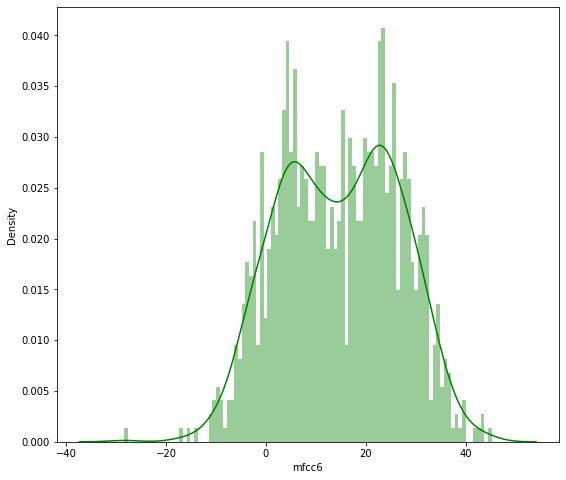

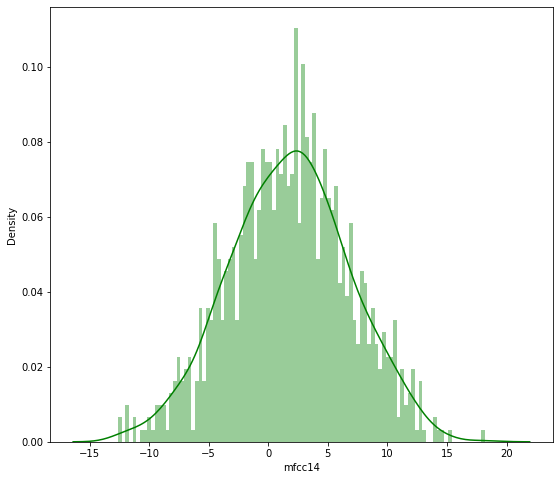

In [53]:
plt.figure(figsize=(9, 8))
sns.distplot(df['mfcc6'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.figure(figsize=(9, 8))
sns.distplot(df['mfcc14'], color='g', bins=100, hist_kws={'alpha': 0.4});
#With this information we can see that the stats are skewed right and some outliers lies above